In [257]:
lines = []

with open("./data/day18_ex.txt") as f:
    while line := f.readline():
        line = line.rstrip()
        lines.append(line.split())
        lines[-1][1] = int(lines[-1][1])
        lines[-1][-1] = lines[-1][-1].replace('(', '').replace(')', '')

In [210]:
lines[:3]

[['R', 9, '#066240'], ['U', 6, '#113213'], ['R', 9, '#052360']]

In [211]:
holes = [[0, 0]]

node = [0, 0]
for direction, count, _ in lines:
    if direction == 'R':
        for _ in range(count):
            node[1] += 1
            holes += [node.copy(),]
    elif direction == 'L':
        for _ in range(count):
            node[1] -= 1
            holes += [node.copy(),]
    elif direction == 'D':
        for _ in range(count):
            node[0] += 1
            holes += [node.copy(),]
    elif direction == 'U':
        for _ in range(count):
            node[0] -= 1
            holes += [node.copy(),]
min_row = min(holes, key=lambda x: x[0])[0]
min_col = min(holes, key=lambda x: x[1])[1]
min_row, min_col

(-233, 0)

In [212]:
max(holes, key=lambda x: x[0])[0], max(holes, key=lambda x: x[1])[1]

(187, 380)

In [213]:
for i in range(len(holes)):
    holes[i][0] -= min_row-1
    holes[i][1] -= min_col-1

In [214]:
min(holes, key=lambda x: x[0])[0], min(holes, key=lambda x: x[1])[1]

(1, 1)

In [215]:
max_row = max(holes, key=lambda x: x[0])[0]
max_col = max(holes, key=lambda x: x[1])[1]
max_row, max_col

(421, 381)

In [216]:
grid = [[0]*(max_col+2) for _ in range(max_row+2)]

for row, col in holes:
    grid[row][col] = 1

q = [(0, 0)]
visited = set()
visited.add((0, 0))
while q:
    row, col = q.pop()
    for x, y in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        if (0 <= row+x <= max_row+1) and (0 <= col+y <= max_col+1) and (row+x, col+y) not in visited and grid[row+x][col+y] == 0:
            visited.add((row+x, col+y))
            q.append((row+x, col+y))

In [217]:
(max_row+2)*(max_col+2), len(visited), (max_row+2)*(max_col+2)-len(visited)

(162009, 109778, 52231)

In [218]:
grid_filled = [[1]*(max_col+2) for _ in range(max_row+2)]

for x, y in visited:
    grid_filled[x][y] = 0

In [220]:
sum([sum(row) for row in grid_filled])

52231

In [221]:
import numpy as np
import matplotlib.pyplot as plt

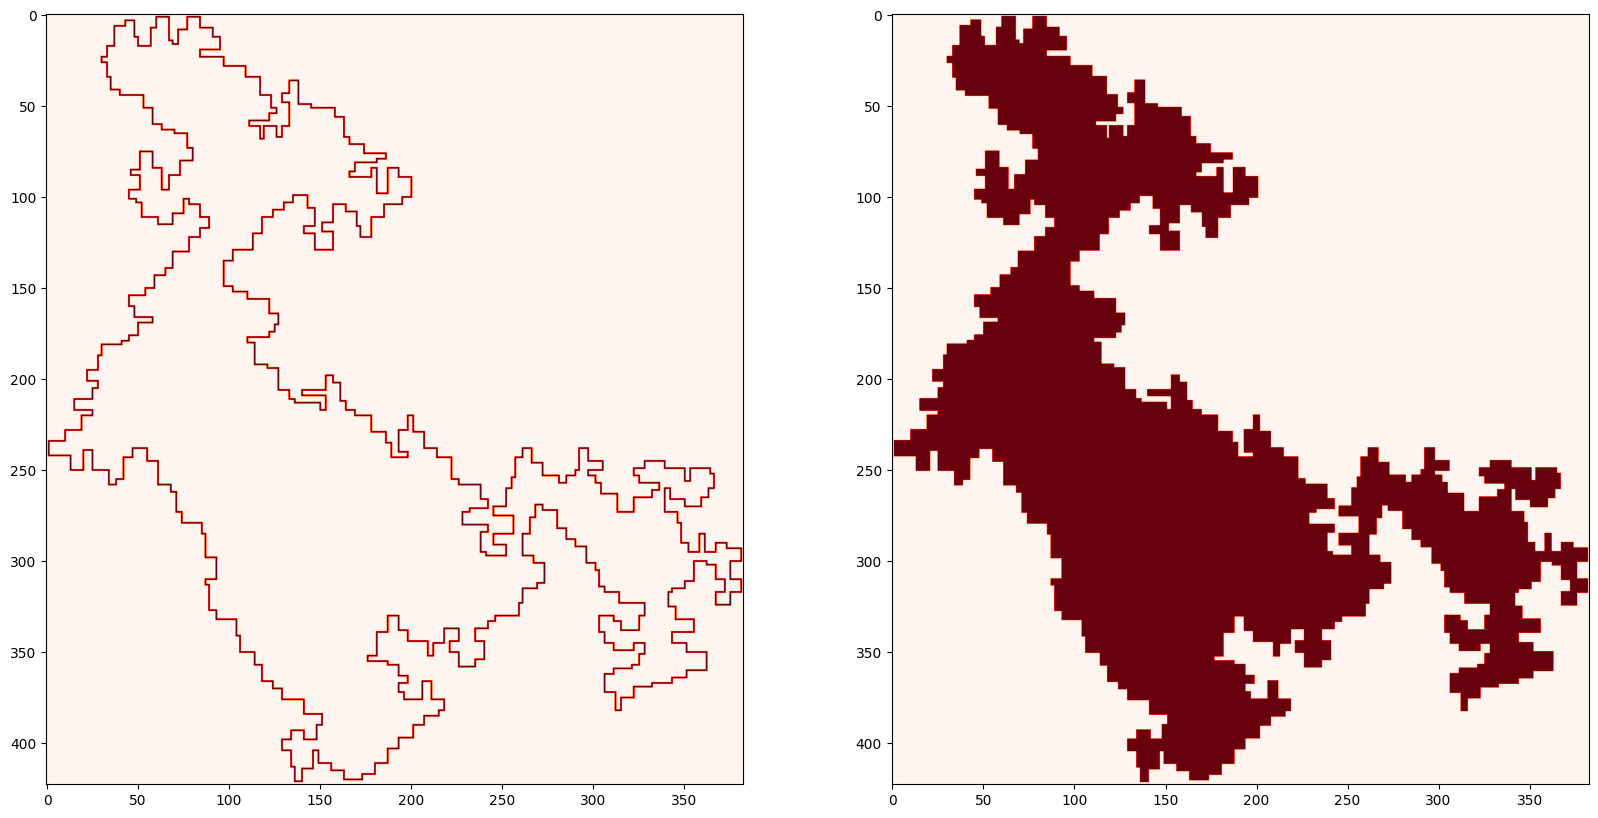

In [222]:
arr = np.array(grid)
arr_filled = np.array(grid_filled)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(arr, cmap=plt.cm.Reds)
axs[1].imshow(arr_filled, cmap=plt.cm.Reds)

In [242]:
lines = []

with open("./data/day18.txt") as f:
    while line := f.readline():
        line = line.rstrip()
        lines.append(line.split())
        lines[-1][1] = int(lines[-1][1])
        lines[-1][-1] = lines[-1][-1].replace('(', '').replace(')', '')

In [243]:
corners = [[0, 0]]

node = [0, 0]
for direction, count, _ in lines:
    if direction == 'R':
        node[1] += count
        corners += [node.copy(),]
    elif direction == 'L':
        node[1] -= count
        corners += [node.copy(),]
    elif direction == 'D':
        node[0] += count
        corners += [node.copy(),]
    elif direction == 'U':
        node[0] -= count
        corners += [node.copy(),]

In [244]:
corners[-1], len(corners), len(lines)

([0, 0], 629, 628)

In [246]:
# Trapezoid formula

res = 0
for i in range(len(corners)-1):
    res += (corners[i][1]+corners[i+1][1])*(corners[i][0]-corners[i+1][0])
abs(res//2)

# should be 52231

50226

In [247]:
# Triangle formula

res = 0
for i in range(len(corners)-1):
    res += (corners[i][0]*corners[i+1][1]) - (corners[i+1][0]*corners[i][1])
abs(res//2)

# should be 52231

50226

In [249]:
52231-abs(res//2)

2005

In [251]:
sum([sum(row) for row in grid])//2

2004

In [265]:
lines = []

with open("./data/day18.txt") as f:
    while line := f.readline():
        lines.append([])
        line = line.rstrip()
        lines[-1].append('R' if line[-2] == '0' else 'D' if line[-2] == '1' else 'L' if line[-2] == '2' else 'U')
        lines[-1].append(int(line[-7:-2], 16))

In [266]:
lines

[['R', 26148],
 ['U', 70433],
 ['R', 21046],
 ['U', 334800],
 ['R', 73377],
 ['D', 224633],
 ['R', 255555],
 ['U', 224633],
 ['R', 188403],
 ['U', 305194],
 ['R', 488420],
 ['U', 227881],
 ['R', 115586],
 ['U', 16079],
 ['R', 299736],
 ['U', 322101],
 ['R', 416246],
 ['U', 65660],
 ['R', 3582],
 ['U', 77586],
 ['R', 122068],
 ['D', 46672],
 ['R', 53344],
 ['D', 450468],
 ['R', 187726],
 ['U', 367332],
 ['R', 207671],
 ['U', 129808],
 ['R', 272724],
 ['U', 459861],
 ['R', 253361],
 ['U', 200721],
 ['R', 353132],
 ['U', 280365],
 ['R', 87288],
 ['U', 176475],
 ['R', 207261],
 ['U', 436452],
 ['R', 423035],
 ['U', 344970],
 ['R', 314631],
 ['D', 193496],
 ['R', 198819],
 ['D', 155230],
 ['R', 324893],
 ['D', 338284],
 ['L', 324893],
 ['D', 66577],
 ['R', 234554],
 ['D', 198396],
 ['R', 344223],
 ['D', 200915],
 ['R', 302817],
 ['D', 272741],
 ['R', 101934],
 ['D', 73390],
 ['R', 31845],
 ['D', 227137],
 ['R', 110669],
 ['U', 177797],
 ['R', 120237],
 ['U', 104886],
 ['L', 120237],
 ['U', 

In [267]:
path_len = 0
corners = [[0, 0]]

node = [0, 0]
for direction, count in lines:
    path_len += count
    if direction == 'R':
        node[1] += count
        corners += [node.copy(),]
    elif direction == 'L':
        node[1] -= count
        corners += [node.copy(),]
    elif direction == 'D':
        node[0] += count
        corners += [node.copy(),]
    elif direction == 'U':
        node[0] -= count
        corners += [node.copy(),]

In [268]:
# Trapezoid formula

res = 0
for i in range(len(corners)-1):
    res += (corners[i][1]+corners[i+1][1])*(corners[i][0]-corners[i+1][0])
abs(res//2)+(path_len//2)+1

57196493937398